## Evaluating the model with a loss function

### Introduction

In the previous section, we discussed our hypothesis function.  We used our hypothesis function to describe the relationship between shot angle and distance and expressed it as a mathematical formula.

$$ distance = 40 * angle $$

And as a function in Python as:

In [1]:
def predicted_distance(angle):
    return 40*angle

In this lesson, we'll learn how to evaluate if our model is any good.

### Evaluating our model

Let's take another look at our hypothesis function expressed as as a line to approximate our plotted points.

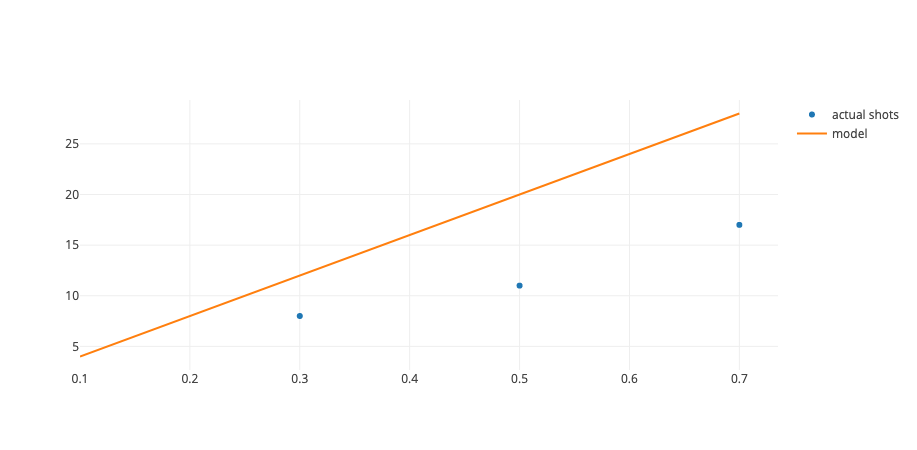

In [2]:
from data import plot_data_and_model
plot_data_and_model()

So remember that the blue dots represent the actual data of each shot angle and it's corresponding distance.  And we use the orange line, hypothesis function or machine learning model, to approximate the relationship between angle and distance.

Our goal is that our hypothesis function predicts the observed target variables -- which is represented graphically by our orange line coming closer to the blue dots.

Let's make this more explicit.

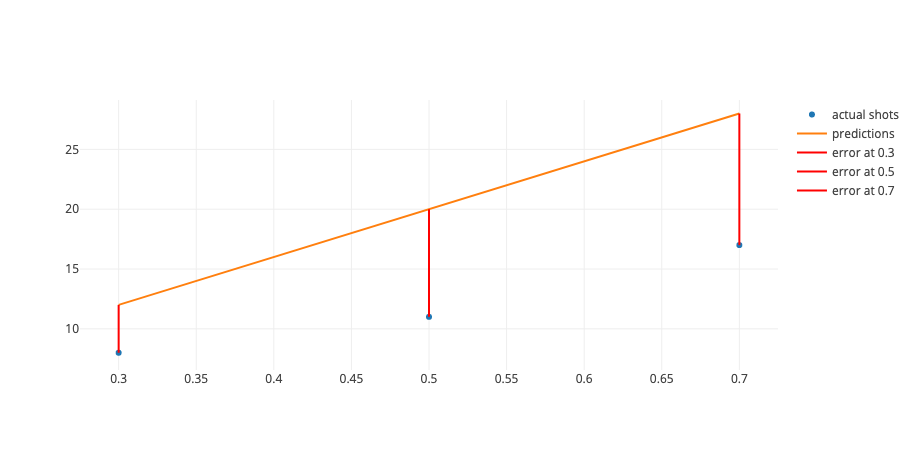

In [1]:
from data import plot_data_and_errors
plot_data_and_errors()

Now each red line represents the difference between the distance that our model predicts for a given angle, and what we actually observed.  

Let's focus in on that first red line.  The model predicts a distance of 13.5 feet while the observed shot distance for our angle of .3 was 8 feet.  The red line shows the difference.  

Now let's turn these red lines into a number.  We do this by calculating the *difference* between the actual data and what our model expects.  We call this difference our **error**.

> error = actual - expected

We can use $y^{(i)}$ to represent an observed target variables, and $\hat{y^{(i)}}$ to represent our predicted output and using $\epsilon$ (epsilon) to represent error, we can rewrite our error function like so.

> $\epsilon^{i} = y^{(i)} - \hat{y^{(i)}}$ 

So this just says that the error at given point equals the outcome we observed at that observation minus the outcome we predicted for that observation.  Let's calculate the errors of our hypothesis function does for our observed data.

| angle        | actual distance | expected distance | error           
| ------------- |:-------------:| :-------------:| :-------------:| 
|    .30        | 8 feet | 12 feet | $8 - 12 = - 4$ | 
|    .50        | 11 feet | 20 feet | $11 - 20 = - 9$ | 
|    .70        | 17 feet | 28 feet | $17 - 28 = - 11$ | 

Ok so we can see that our error for the first point is $8 - 12 = -4$.  And we can even calculate the **total error** of our model, just by adding these numbers up. 

$$total\_error = -4 + -9 + -11 = - 24$$

For now, we don't really care whether our numbers are positive or negative, what we care is whether just how close the number is to zero.  The closer the number is to zero the better we do.  

After all, if our model perfectly predicts our first distance of 8 feet, then this means that $error = actual - expected = 8 - 8 = 0$.

### One small problem

Now one way to discover if our hypothesis function is any good is to compare it with other hypothesis functions.  So let's change our the parameter of our hypothesis function from the following:

$$ distance=40∗angle $$ 

to: 

$$ distance=25∗angle $$

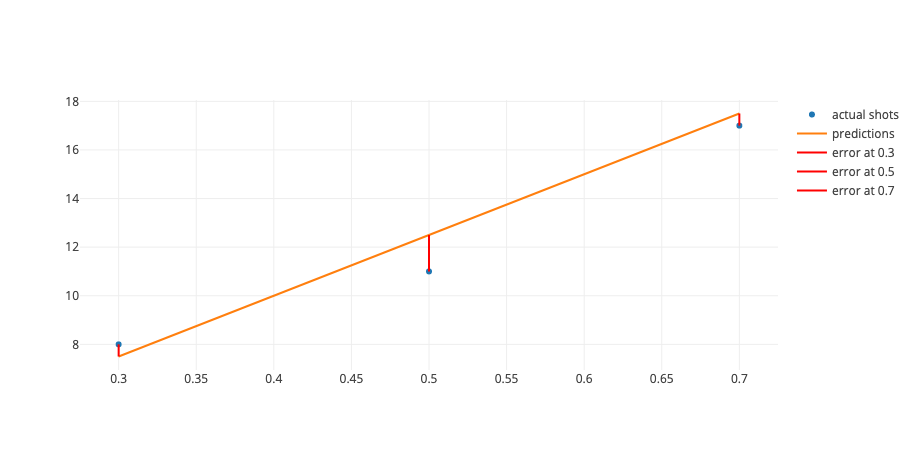

In [3]:
from data import updated_model_with_errors

parameter = 25
# feel free to change the parameter to 40 and then re-execute the function
updated_model_with_errors(parameter)

Now let's recalculate our total error.

First we calculate the error at each data point.

| angle        | actual distance | expected distance | error           
| ------------- |:-------------:| :-------------:| :-------------:| 
|    .30        | 8 feet | 7.5 feet | $8 - 7.5  = .5 $ | 
|    .50        | 11 feet | 12.5 feet | $11 - 12.5 = - 1.5 $ | 
|    .70        | 17  feet | 17.5 feet | $17 - 17.5 = -.5 $ | 

And adding up our total error we get: 

$.5 - 1.5 - .5 = -1.5$

**This is quite odd.**  

Our total error equals the error that we just got at our second point, $- 1.5$.

How did this happen? Well, the issue we run into is that our first and last errors cancel each other out: $.5$, and $-.5$.  This isn't good.  We want our total error to increase each time that our predicted output differs from our observed output.  We don't want our errors to cancel each other out.

We fix this by simply making each error positive, which we do by squaring the error.  $.5^2 + -1.5^2 + .5^2 = .25 + 2.25 +  .25 = 2.75$.

So now, because each individual squared error is always positive, they will not cancel each other out.  We call this the **residual sum of the squared** (RSS). Residual is just another word for error.

### Comparing models

And now that we have expressed how well a model predicts our data with RSS, we can start to compare models to data.  For example, we go back and calculate the RSS for our first model of $$ distance=40∗angle $$.

| angle        | actual distance | expected distance | squared error           
| ------------- |:-------------:| :-------------:| :-------------:| 
|    .30        | 8 feet | 12 feet | $8 - 12 = 16$ | 
|    .50        | 11 feet | 20 feet | $11 - 20 = 81$ | 
|    .70        | 17 feet | 28 feet | $17 - 28 = 121$ | 

In [4]:
16 + 81 + 121

218

So the of $distance = 40*angle$ has an RSS of 218.  And our model of $distance = 25*angle$ has a squared 2.75. So because the RSS is smaller with our second model,  our second model is better fit to the data than our first model.

### Summary

In this lesson, we saw how to evaluate a machine learning model.  We do this by seeing how well the model matches the actual data.  The closer the model is to the data, the better our model.  

We can summarize how well the model fits the data by calculating the error at each of our actual data points, where our $error =  actual - expected$.  We add up the error at each datapoint to calculate the **total error**.

Then we saw that **total error** has a flaw, where the errors can cancel each other out when some errors are positive and others are negative.  To fix this, we make each of our errors positive by squaring each error.  And then we add up our squared errors to calculate the **residual sum of the squares** (RSS).  We can use our RSS score to try different models and then choose the one with the lowest score.